# CRISP-DM Methodology for UFC Fight Prediction

## 1. Business Understanding
   - Define the problem: Predict the winner of UFC fight.
   - Objectives: Create an ML model to predict winners accurately.
   - Success criteria: Achieve prediction accuracy above 70%.

## 2. Data Understanding
   - Gather data: Collect historical UFC fight data.
   - Explore data: Understand its structure, quality, and relationships.

## 3. Data Preparation
   - Preprocess data: Handle missing values, outliers, etc.
   - Feature engineering: Create or transform features for better performance.

## 4. Modeling
   - Select algorithms: Choose suitable ML algorithms.
   - Train-test split: Divide data into training and testing sets.
   - Model training: Train selected algorithms on training data.
   - Model evaluation: Assess model performance using various metrics.

## 5. Evaluation
   - Assess model performance: Compare models, tune hyperparameters.
   - Validate results: Validate model on testing data.

## 6. Deployment
   - Deploy the model: Integrate into a platform for predictions.
   - Monitor performance: Continuously monitor and update the model.

## 7. Iterative Improvement
   - Gather feedback: Collect user and stakeholder feedback.
   - Update the model: Incorporate feedback and new data.
   - Repeat the process: Iterate through the CRISP-DM process for improvements.


1. **Import Libraries**:
   - Import necessary libraries for data manipulation, visualization, and machine learning algorithms.

2. **Load the Dataset**:
   - Use Pandas to read the dataset from a file into a DataFrame.

3. **Exploratory Data Analysis (EDA)**:
   - Examine dataset structure, data types, summary statistics, distributions, and identify missing values and outliers.

4. **Data Preprocessing**:
   - Handle missing values, encode categorical variables, scale numerical features, and split the dataset into features and labels.

5. **Split Data into Training and Testing Sets**:
   - Split the dataset into training and testing sets.

6. **Choose a Model**:
   - Select a machine learning algorithm suitable for the problem type.

7. **Train the Model**:
   - Train the selected model using the training dataset.

8. **Evaluate the Model**:
   - Evaluate the model's performance using the testing dataset.

9. **Tune Hyperparameters** (Optional):
   - Fine-tune the model's hyperparameters to improve performance.

10. **Make Predictions**:
    - Use the trained model to make predictions on new data.

11. **Evaluate and Iterate**:
    - Evaluate the model's performance on real-world data and iterate as necessary.

12. **Deploy the Model** (Optional):
    - If the model performs satisfactorily, deploy it in a production environment.
    

### Step 1: Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

### Step 2: Load the Dataset

In [18]:
pd.set_option('display.max_rows', 200)
data_file = 'DataUfc/data.csv'
df = pd.read_csv(data_file)

### Step 3: Exploratory Data Analysis (EDA)

In [19]:
#Preview of dataset provided by kaggle
df.head(10)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.000,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.000,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
5,Leonardo Santos,Grant Dawson,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.000,...,2,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0
6,Song Kenan,Max Griffin,Keith Peterson,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.125,...,1,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0
7,Derek Brunson,Kevin Holland,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.156250,0.000,...,4,7,1,0,Southpaw,185.42,195.58,185.0,28.0,37.0
8,Montel Jackson,Jesse Strader,Keith Peterson,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,NaN,NaN,...,2,0,1,0,Southpaw,177.80,190.50,135.0,29.0,28.0
9,Bruno Silva,JP Buys,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Flyweight,NaN,NaN,...,0,0,0,0,NaN,182.88,NaN,185.0,24.0,31.0


In [20]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011
R_fighter,Adrian Yanez,Trevin Giles,Tai Tuivasa,Cheyanne Buys,Marion Reneau,Leonardo Santos,Song Kenan,Derek Brunson,Montel Jackson,Bruno Silva,...,Johnny Rhodes,Royce Gracie,Frank Hamaker,Royce Gracie,Jason DeLucia,Remco Pardoel,Orlando Wiet,Johnny Rhodes,Patrick Smith,Scott Morris
B_fighter,Gustavo Lopez,Roman Dolidze,Harry Hunsucker,Montserrat Conejo,Macy Chiasson,Grant Dawson,Max Griffin,Kevin Holland,Jesse Strader,JP Buys,...,Fred Ettish,Minoki Ichihara,Thaddeus Luster,Jason DeLucia,Scott Baker,Alberta Cerra Leon,Robert Lucarelli,David Levicki,Ray Wizard,Sean Daugherty
Referee,Chris Tognoni,Herb Dean,Herb Dean,Mark Smith,Mark Smith,Chris Tognoni,Keith Peterson,Herb Dean,Keith Peterson,Mark Smith,...,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy
date,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,...,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11
location,"Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA",...,"Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA"
Winner,Red,Red,Red,Blue,Blue,Blue,Blue,Red,Red,Red,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Bantamweight,Middleweight,Heavyweight,WomenStrawweight,WomenBantamweight,Lightweight,Welterweight,Middleweight,Bantamweight,Flyweight,...,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight
B_avg_KD,0.0,0.5,NaN,NaN,0.125,0.0,0.046875,0.15625,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
B_avg_opp_KD,0.0,0.0,NaN,NaN,0.0,0.0,0.125,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Let's check datatypes by using info this code will give datatype as well as dimension of the dataset and description of the dataset

In [21]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 144 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    R_fighter                     6012 non-null   object 
 1    B_fighter                     6012 non-null   object 
 2    Referee                       5980 non-null   object 
 3    date                          6012 non-null   object 
 4    location                      6012 non-null   object 
 5    Winner                        6012 non-null   object 
 6    title_bout                    6012 non-null   bool   
 7    weight_class                  6012 non-null   object 
 8    B_avg_KD                      4585 non-null   float64
 9    B_avg_opp_KD                  4585 non-null   float64
 10   B_avg_SIG_STR_pct             4585 non-null   float64
 11   B_avg_opp_SIG_STR_pct         4585 non-null   float64
 12   B_avg_TD_pct                  4585 non-null   

#### Summary Statistics for Numerical Columns:

In [11]:
#Calculate summary statistics for numerical columns (mean, median, standard deviation, etc.).
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [12]:
df.shape

(6012, 144)

In [13]:
df.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
B_avg_KD                        float64
B_avg_opp_KD                    float64
B_avg_SIG_STR_pct               float64
B_avg_opp_SIG_STR_pct           float64
B_avg_TD_pct                    float64
B_avg_opp_TD_pct                float64
B_avg_SUB_ATT                   float64
B_avg_opp_SUB_ATT               float64
B_avg_REV                       float64
B_avg_opp_REV                   float64
B_avg_SIG_STR_att               float64
B_avg_SIG_STR_landed            float64
B_avg_opp_SIG_STR_att           float64
B_avg_opp_SIG_STR_landed        float64
B_avg_TOTAL_STR_att             float64
B_avg_TOTAL_STR_landed          float64
B_avg_opp_TOTAL_STR_att         float64


### Column definitions:

```markdown
- **R_ and B_ Prefix**: Signifies red and blue corner fighter stats respectively.
- **_opp_ Columns**: Contain the average of damage done by the opponent on the fighter.
- **KD**: Number of knockdowns.
- **SIG_STR**: Number of significant strikes landed of attempted.
- **SIG_STR_pct**: Significant strikes percentage.
- **TOTAL_STR**: Total strikes landed of attempted.
- **TD**: Number of takedowns.
- **TD_pct**: Takedown percentages.
- **SUB_ATT**: Number of submission attempts.
- **PASS**: Number of times the guard was passed.
- **REV**: Number of reversals landed.
- **HEAD**: Number of significant strikes to the head landed of attempted.
- **BODY**: Number of significant strikes to the body landed of attempted.
- **CLINCH**: Number of significant strikes in the clinch landed of attempted.
- **GROUND**: Number of significant strikes on the ground landed of attempted.
- **win_by**: Method of win.
- **last_round**: Last round of the fight (e.g., if it was a KO in 1st, then this will be 1).
- **last_round_time**: When the fight ended in the last round.
- **Format**: Format of the fight (3 rounds, 5 rounds, etc.).
- **Referee**: Name of the referee.
- **Date**: Date of the fight.
- **Location**: Location in which the event took place.
- **Fight_type**: Weight class and whether it's a title bout or not.
- **Winner**: Winner of the fight.
- **Stance**: Stance of the fighter (orthodox, southpaw, etc.).
- **Height_cms**: Height in centimeters.
- **Reach_cms**: Reach of the fighter (arm span) in centimeters.
- **Weight_lbs**: Weight of the fighter in pounds (lbs).
- **Age**: Age of the fighter.
- **title_bout**: Boolean value of whether it is a title fight or not.
- **weight_class**: Weight class the fight is in (Bantamweight, Heavyweight, Women's Flyweight, etc.).
- **no_of_rounds**: Number of rounds the fight was scheduled for.
- **current_lose_streak**: Count of current concurrent losses of the fighter.
- **current_win_streak**: Count of current concurrent wins of the fighter.
- **draw**: Number of draws in the fighter's UFC career.
- **wins**: Number of wins in the fighter's UFC career.
- **losses**: Number of losses in the fighter's UFC career.
- **total_rounds_fought**: Average of total rounds fought by the fighter.
- **total_time_fought (seconds)**: Count of total time spent fighting in seconds.
- **total_title_bouts**: Total number of title bouts taken part in by the fighter.
- **win_by_Decision_Majority**: Number of wins by majority judges decision in the fighter's UFC career.
- **win_by_Decision_Split**: Number of wins by split judges decision in the fighter's UFC career.
- **win_by_Decision_Unanimous**: Number of wins by unanimous judges decision in the fighter's UFC career.
- **win_by_KO/TKO**: Number of wins by knockout in the fighter's UFC career.
- **win_by_Submission**: Number of wins by submission in the fighter's UFC career.
- **win_by_TKO_Doctor_Stoppage**: Number of wins by doctor stoppage in the fighter's UFC career.
```

### Let's check for null values

In [17]:
# The below code shows null values present in the data in column-wise
df.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           32
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1427
B_avg_opp_KD                    1427
B_avg_SIG_STR_pct               1427
B_avg_opp_SIG_STR_pct           1427
B_avg_TD_pct                    1427
B_avg_opp_TD_pct                1427
B_avg_SUB_ATT                   1427
B_avg_opp_SUB_ATT               1427
B_avg_REV                       1427
B_avg_opp_REV                   1427
B_avg_SIG_STR_att               1427
B_avg_SIG_STR_landed            1427
B_avg_opp_SIG_STR_att           1427
B_avg_opp_SIG_STR_landed        1427
B_avg_TOTAL_STR_att             1427
B_avg_TOTAL_STR_landed          1427
B_avg_opp_TOTAL_STR_att         1427
B_avg_opp_TOTAL_STR_landed      1427
B_avg_TD_att                    1427
B

As we can see above, Blue fighters have 1427 missing rows and Red fighters have 712, which means they probably must not have had any UFC fights before, that's why their stats data are missing. We can not delete them, since in total we got 6012 rows, and deleting 1/3(1427 + 712) of it will significantly reduces the size of your dataset and affect on it's shape. 
Instead of deleting the missing rows, we can impute the missing values with sensible replacements. 
For numerical features, we will fill missing values with the mean, median, or mode of the respective feature. For categorical features, you might fill missing values with the most frequent category.

#### Visualisation of Relationships Between Variables:

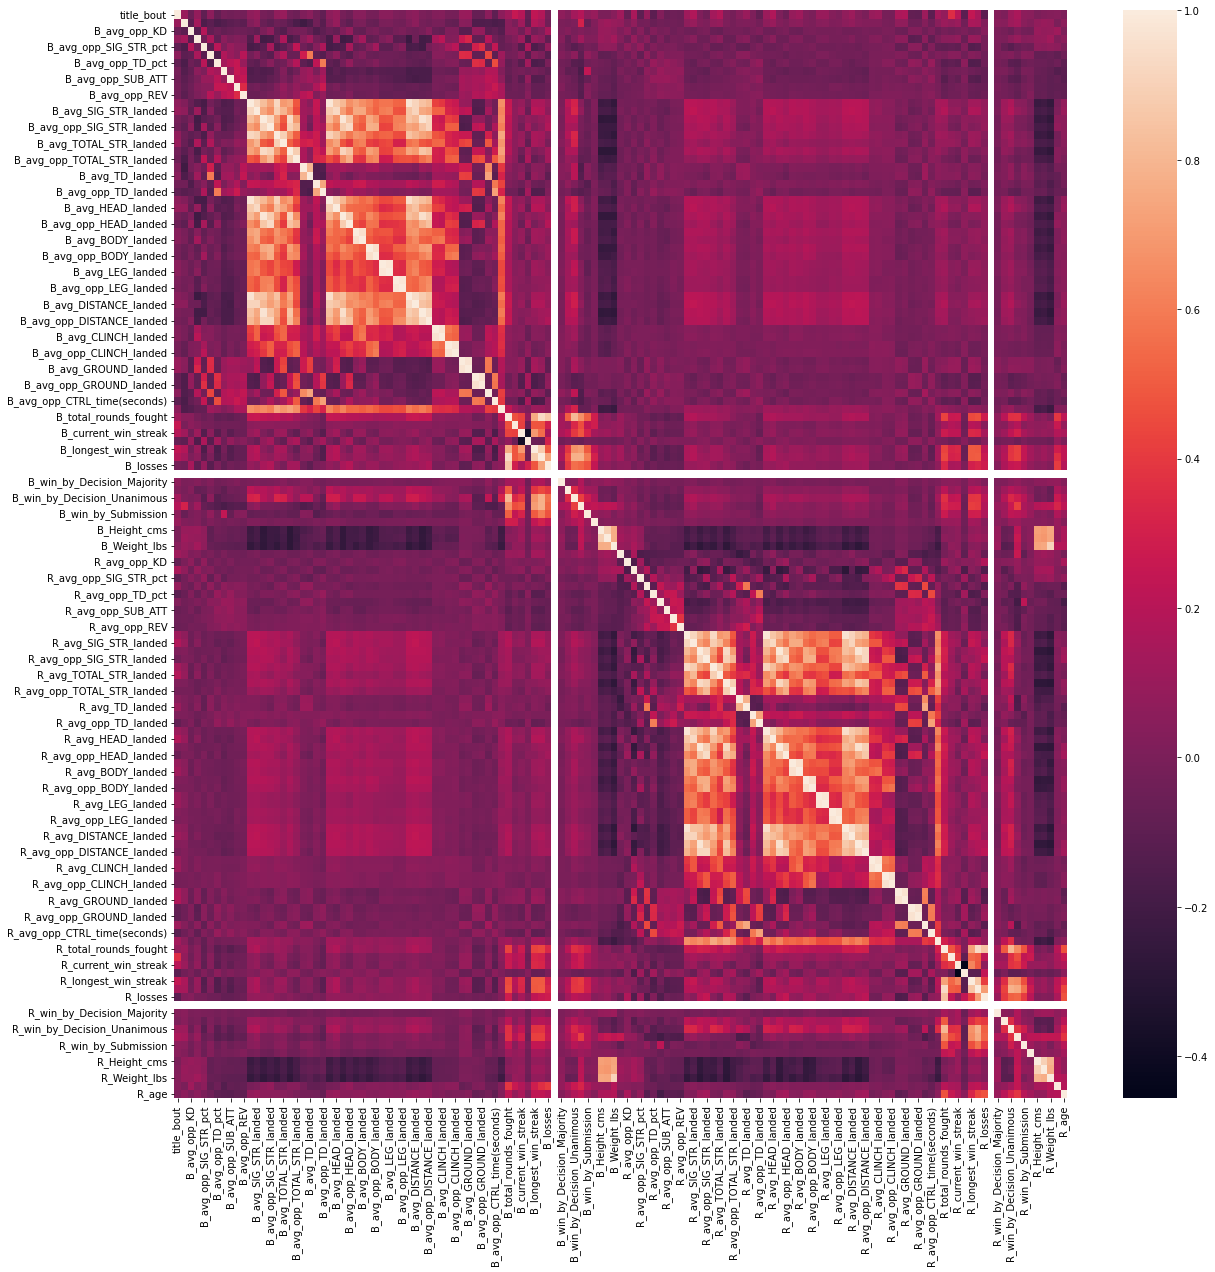

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

plt.show()

#### Target "ACTION" Distribution 

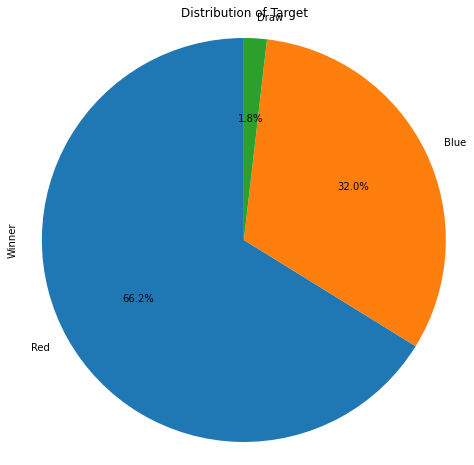

In [25]:
# Set the figure size
plt.figure(figsize=(8, 8))
# Plot pie chart
df['Winner'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 4: Data Preprocessing:

### Dealing with NaNs

In [ ]:
df.isnull()
# Returns a boolean matrix, if the value is NaN then True otherwise False

In [ ]:
# Returns the column names along with the number of NaN values in that particular column
for column in df.columns:
    if df[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df[column].isnull().sum()}")



* Referee doesn't look like an important column. Let's delete that.
* Let's see if height and reach have a correlation
* The rest i.e. Age, Stance and Height, let's fill with the median of that column.

In [ ]:
df['Referee'].isnull().sum()

In [ ]:
df2 = df.copy()

In [ ]:
df2['Referee'].head()

In [ ]:
df2.drop(columns=['Referee'], inplace=True)

In [ ]:
df2['R_Reach_cms']


In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('R_Height_cms', # Horizontal axis
           'R_Reach_cms', # Vertical axis
           data=df2, # Data source
           fit_reg=True # fix a regression line
           ) # S marker size

* We can see there is a positive correlation between height and reach. So we'll replace reach with height

In [ ]:
df2['R_Reach_cms'].fillna(df2['R_Height_cms'], inplace=True)
df2['B_Reach_cms'].fillna(df2['B_Height_cms'], inplace=True)
df2.fillna(df2.median(), inplace=True)

In [ ]:
df2['B_Stance'].value_counts()

In [ ]:
df2['R_Stance'].fillna('Orthodox', inplace=True)
df2['B_Stance'].fillna('Orthodox', inplace=True)

In [ ]:
for column in df2.columns:
    if df2[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df2[column].isnull().sum()}")

In [ ]:
df2.isnull().sum()

### Removing non essential columns